# Building Explainable Machine Learning Models
## Exercise: Partial Dependence Plot(PDP) & Individual Conditional Expectation(ICE) Plots





Permutation Importance gives us the features that affect the predicions, the partial dependence plots on the other hand, tell us how a feature affects the predictions. PDPs can analyze the interaction between the target and the input feature of interest, while marginalizing all the other input features [1]. In other words. what happens to the target when one of the feature changes but all other variables are held constant. 


<div class="alert alert-block alert-info">

* [1]PDPs were introduced in the context of gradient boosting machines (GBM) by Friedman (2000)- Friedman, Jerome H. [“Greedy Function Approximation: A Gradient Boosting Machine.”](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boostingmachine/10.1214/aos/1013203451.full) Annals of Statistics 29: 1189–1232.
    
* Partial Dependence is calculated after a model has been fitted. So, let’s train and fit a Random Forest Classifier model on the training data.
    
* Also make sure that the model has a good predictive performance or in other words you have trained a good model before inspecting the importance of its features. There is no point in investigating a bad model.
    </div>



During this exercise, you are going to be working with the Partial Dependence Plots(PDPs) on the [Heart disease data ](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) using scikit-learn. You'll perform the following steps:

1. Import and preprocess the dataset
2. Train a Random Forest classifier on the data.
3. Compute and plot one and two dimensional PDPs.
4. Explain the results


Let's get started!

---

## Case Study: Diagnosing Heart Disease

You are given some diagnostic data of few patients.The objective of the dataset is to predict where the patient has a heart disease or not based on the other diagnostic measurements provided in the dataset.

![](https://cdn.pixabay.com/photo/2015/03/09/07/55/heart-665177_960_720.jpg)





## Importing Necessary Libraries

Let’s start by importing the necessary libraries.

In [ ]:
import numpy as np   
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
np.random.seed(123) #ensure reproducibility

import warnings  
warnings.filterwarnings("ignore")

In [ ]:
# setting up the styling for the plots in this notebook
sns.set(style="white", palette="colorblind", font_scale=1.2, 
        rc={"figure.figsize":(12,8)})

##  Reading in the Dataset

The dataset used is called the **Heart disease data**  and is hosted at the UCI Machine Learning repository and available at this [link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).The dataset used in this notebook belongs to the [Kaggle version and can be accessed here](https://www.kaggle.com/ronitf/heart-disease-uci). The objective of the dataset is to predict where the patient has a heart disease or not based on the other diagnostic measurements provided in the dataset.



> **Source**:
>
> Creators:
>
>1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
>2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
>3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
>4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
>
> Donor:
>
>David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Let’s read in the data and look at the first few rows



In [ ]:
df = pd.read_csv('data/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


-   **age**: The person's age in years
-   **sex**: The person's sex (1 = male, 0 = female)
-   **cp:**  The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
-   **trestbps:**  The person's resting blood pressure (mm Hg on admission to the hospital)
-   **chol:**  The person's cholesterol measurement in mg/dl
-   **fbs:**  The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
-   **restecg:**  Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
-   **thalach:**  The person's maximum heart rate achieved
-   **exang:**  Exercise induced angina (1 = yes; 0 = no)
-   **oldpeak:**  ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more  [here](https://litfl.com/st-segment-ecg-library/))
-   **slope:**  the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
-   **ca:**  The number of major vessels (0-3)
-   **thal:**  A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
-   **target:**  Heart disease (0 = no, 1 = yes)




As can be seen, the dataset consists of various predictor variables like `age`, `sex`, `cholestrol`, etc, and one target variable, `target`. The `target` variable is 1 if the patient has a heart disease and 0 for no heart disease. It is a classic binary classification problem. Also, let's check out if there are any missing values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values and no string columns in the given dataset.

In [ ]:
# Inspecting Distribution of Target Variable

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64



## Data Preparation 

### Renaming Columns
Let's change the column names to be a bit clearer.





In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Train/Test Split
Splitting the dataset into traininga and validation dataset.

In [ ]:
# Creating the target and the features column and splitting the dataset into test and train set.
  
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  
  
# splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



## Training the classifier

Now you will fit a [Random Forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with 10 estimators and compute the [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) achieved:

In [ ]:
# Training and fitting a Random Forest Model

model_rf = RandomForestClassifier(n_estimators=30,max_depth=5,random_state=0).fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_rf.predict_proba(X_test)[:, 1]

# Print the AUC score achieved by the classifier on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr)



0.9210711768851303

We now have our model and our predictions. Let’s now explore the different ways by which we can understand the model and its predictions in a more meaningful way. 

---

## Calculating Partial Dependence plots

Partial Dependence plots are calculated as follows:

* Train a model
* Set all the values for the `feature of interest` to a particluar value without touching any other variables.
* Make predictions on the modified dataset using the previously trained model
* Average over all the predictions. 
* Repeat for all the different values of the `feature of interest`.



The `sklearn.inspection` module provides a convenience function `plot_partial_dependence` to create one-way and two-way partial dependence plots. 


## Plotting 1D PDPs

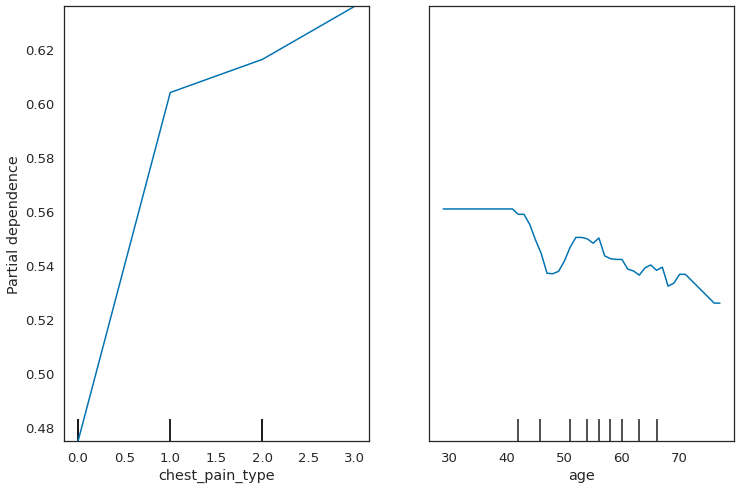

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = ['chest_pain_type', 'age']
display = PartialDependenceDisplay.from_estimator(
       model_rf, X_train, features)

### Interpretation

-   The Y-axis represents the change in prediction from what would be predicted at the baseline.
-   For the `chest_pain_type` graph, we observe that probability of a person having heart condition steeply increases in the beginning and then the increase gets lets steep.
-    we see also see that chances of heart disease are high around 40-45 years and then after a small dip again there is a high probability around 55. Why is there reduced heart disease probability at 60? This might be because people are receiving some kind of medical care at this age. 


## ICE Plots

Partial dependence plots show the average effect of the features of interest while [ICE]([Individual Conditional Expectation](https://arxiv.org/abs/1309.6392)) plots visualize the dependence of the prediction on a feature for each sample separately, with one line per sample.

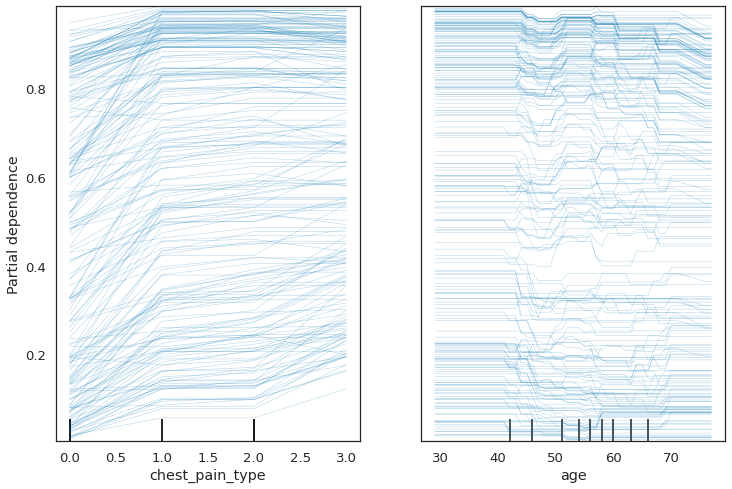

In [ ]:
features = ['chest_pain_type', 'age']
display = PartialDependenceDisplay.from_estimator(
       model_rf, X_train, features,kind='individual')

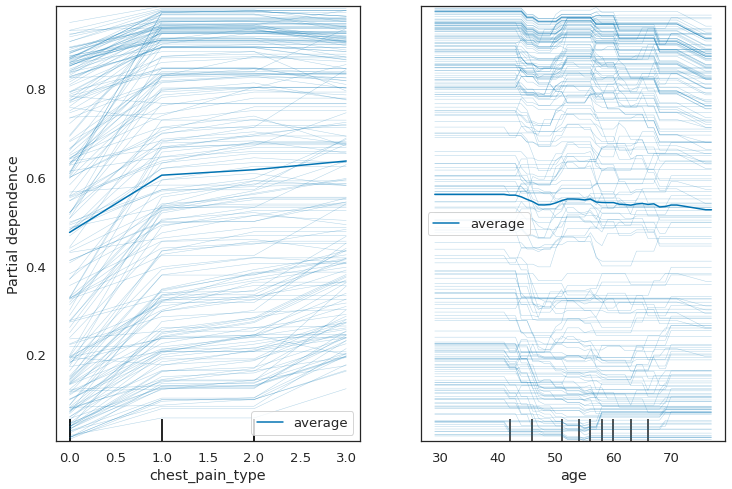

In [ ]:
features = ['chest_pain_type', 'age']
display = PartialDependenceDisplay.from_estimator(
       model_rf, X_train, features,kind='both')

## 2D interaction plots

We can also plot interaction among features. Let's see how age and cholesterol level interact to predict the probability of a heart disease.

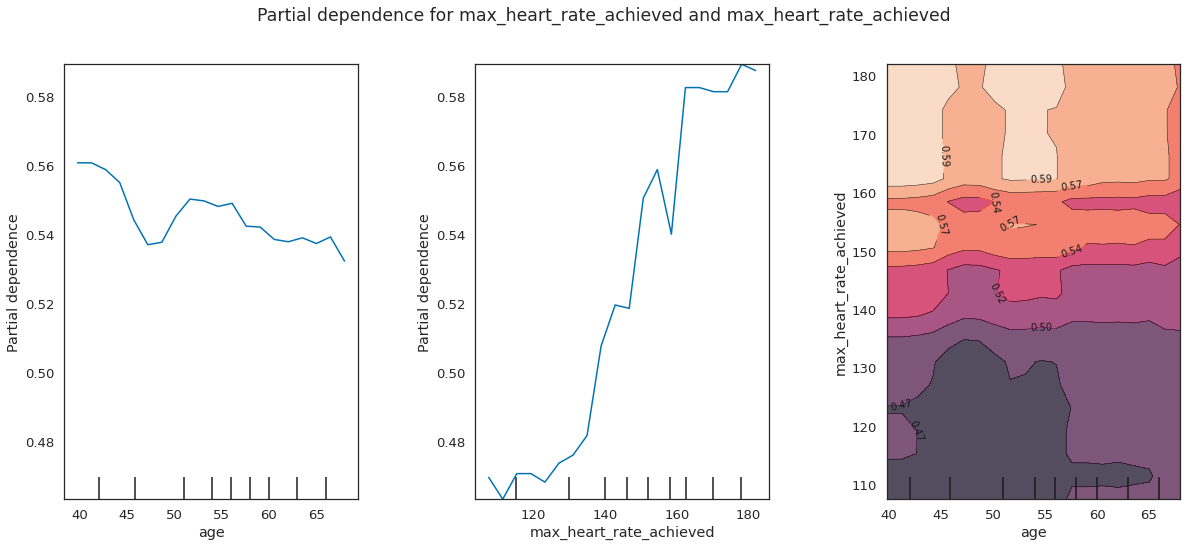

In [ ]:
features = ['age', 'max_heart_rate_achieved', ('age', 'max_heart_rate_achieved')]
_, ax = plt.subplots(ncols=3, figsize=(20,8))
display = PartialDependenceDisplay.from_estimator(
       model_rf,X_train, features, kind='average', n_jobs=3, grid_resolution=20,
    ax=ax
)
display.figure_.suptitle(
    'Partial dependence for age and max_heart_rate_achieved'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)


The two-way partial dependence plot shows the dependence of average target value on joint values of patient's age and heart rate levels. We can clearly see an interaction between the two features.



### References

[1] https://scikit-learn.org/stable/modules/partial_dependence.html

[2] T. Hastie, R. Tibshirani and J. Friedman, [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn), Second Edition, Section 10.13.2, Springer, 2009.

[3] C. Molnar, [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book), Section 5.1, 2019.

[4] A. Goldstein, A. Kapelner, J. Bleich, and E. Pitkin, [Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation](https://arxiv.org/abs/1309.6392), Journal of Computational and Graphical Statistics, 24(1): 44-65, Springer, 2015.

---